<a href="https://colab.research.google.com/github/Novaz-Edd/Machine-Learning-Models/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Read the uploaded file name "heart.csv"
df = pd.read_csv('heart.csv')

# 2. Preprocessing (Turn 'sex: male' into 'sex_male: 1')
df = pd.get_dummies(df, drop_first=True)

# 3. Separate Input (X) and Target (y)
# Target is 'target' (1 = Heart Disease, 0 = Healthy)
X = df.drop('target', axis=1)
y = df['target']

# 4. Split into Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Data Loaded! Training with {X_train.shape[0]} patients.")
print(f"Testing with {X_test.shape[0]} patients.")

✅ Data Loaded! Training with 242 patients.
Testing with 61 patients.


# **K-Nearest Neighbors**

🎯 KNN Accuracy: 0.69 (This means 68.85245901639344% correct)



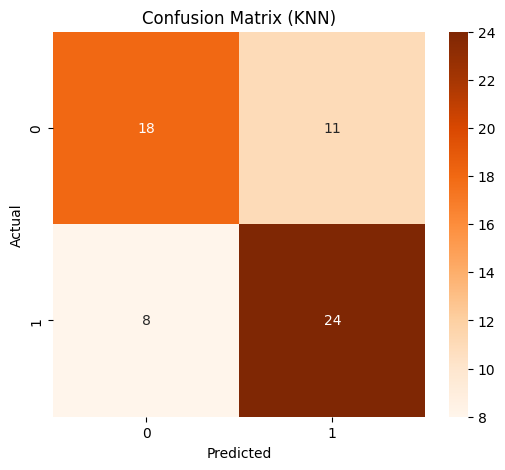

y_train target
1    133
0    109
Name: count, dtype: int64
y_test target
1    32
0    29
Name: count, dtype: int64


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Train the Model
# n_neighbors=5 is the standard starting point
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# 2. Predict
y_pred_knn = knn_model.predict(X_test) #(n_neighbors=5)

# 3. See how well it did
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"🎯 KNN Accuracy: {acc_knn:.2f} (This means {acc_knn*100}% correct)\n")

# 4. Visualize the Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6,5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges') # Changed color to Orange
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (KNN)')
plt.show()



# Assuming y_train is a Pandas Series
print("y_train",y_train.value_counts())
print("y_test",y_test.value_counts())

# **Algorithm Under the Hood**

🎯 KNN Accuracy: 0.69


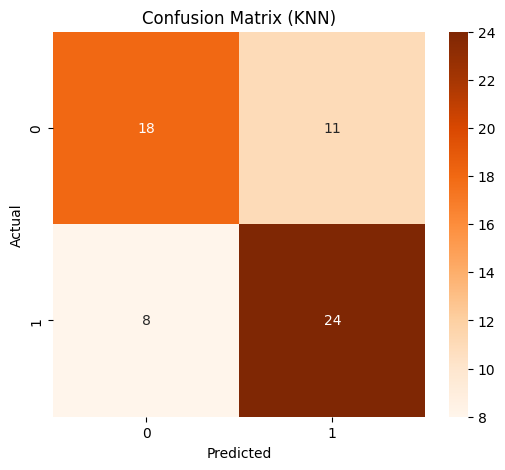

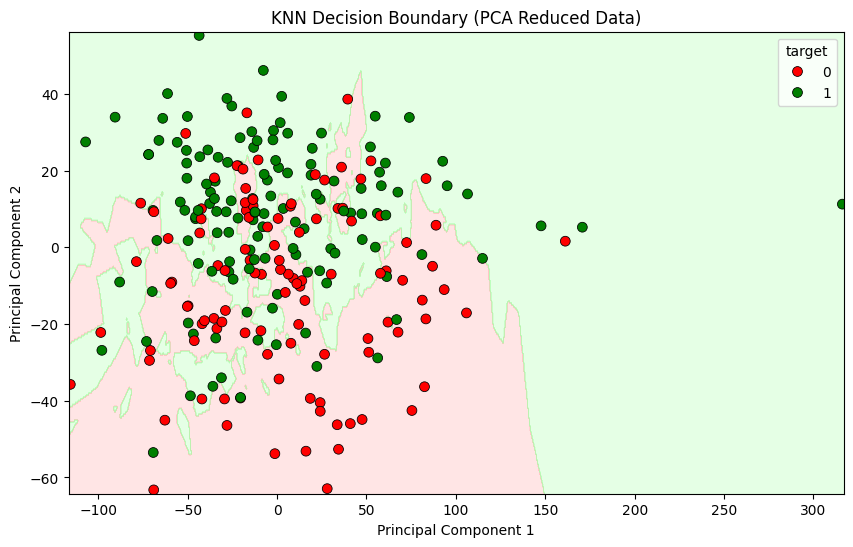

y_train counts:
 target
1    133
0    109
Name: count, dtype: int64
y_test counts:
 target
1    32
0    29
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# 1. Load and Prepare Data
df = pd.read_csv('heart.csv')
X = df.drop('target', axis=1)
y = df['target']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train and Predict (User's Logic)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# 3. Accuracy
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"🎯 KNN Accuracy: {acc_knn:.2f}")

# 4. Confusion Matrix Visualization
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (KNN)')
plt.show()

# 5. Advanced Visualization: Decision Boundary with PCA
# Reduce 13 dimensions to 2 for plotting
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Train a new KNN on just these 2 dimensions for the plot
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train_pca, y_train)

# Create a mesh grid to show the background colors
h = .5  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on the mesh
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA']) # Light Red/Green
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.3)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train,
                palette=['red', 'green'], edgecolor="k", s=50)
plt.title("KNN Decision Boundary (PCA Reduced Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()